In [1]:
import boto3
import numpy as np
import mxnet as mx
from mxnet.gluon.model_zoo import vision
from io import BytesIO
from matplotlib import pyplot as plt
%matplotlib inline

s3 = boto3.client('s3')

In [2]:
model = vision.get_model(name='mobilenet1.0', pretrained=True, root='/tmp/.mxnet/models')

In [30]:
s3_bucket = 'jakechenawstemp'
s3_key = 'dog.1.jpg'

response = s3.get_object(
    Bucket=s3_bucket,
    Key=s3_key
)

In [32]:
image = mx.image.imdecode(response['Body'].read())

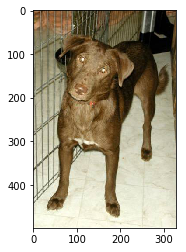

In [33]:
plt.imshow(image.asnumpy())

In [6]:
image = image.astype('float32')/255

image = mx.image.color_normalize(image,
                                 mean=mx.nd.array([0.485, 0.456, 0.406]),
                                 std=mx.nd.array([0.229, 0.224, 0.225]))

image = image.reshape([1, -1, image.shape[0], image.shape[1]])

In [7]:
features = model.features(image)

In [29]:
with BytesIO() as b:
    np.save(b, features.asnumpy())
    b.seek(0)
    s3.put_object(
        Body = b,
        Bucket=s3_bucket,
        Key="{}.npy".format(s3_key)
    )

In [79]:
s3_bucket = 'jakechenawstemp'
s3_key = 'images/cat.1000.jpg.npy'

response = s3.get_object(
    Bucket=s3_bucket,
    Key=s3_key
)

In [80]:
with BytesIO(response['Body'].read()) as b:
    x = np.load(b)

In [81]:
x

array([[ 0.10030217,  0.15709534,  0.16719458, ...,  0.36648282,
         0.1002858 ,  1.25880289]], dtype=float32)